## Data Science Portfolio - NBA Trends Notebook ##

### Created by: Albert Schultz ###

### Date Created: 06/09/2023 ###

### Version: 1.00 ###

### Executive Summary ###
This notebook goes over the analysis of the National Basketball Association's (NBA) game trends. This notebook contains quite a bit of possible associations. 

## Table of Contents ##

1. [Introduction](#1.-Introduction)
2. [Purpose, Vision, and Goals](#2.-Purpose-Vision,-and-Goals)
3. [Import the Dataset](#3.-Import-the-Dataset)
4. [Review the NBA Dataset](#4.-Review-the-NBA-Dataset)
5. [Exploratory Data Analysis](#5.-Exploratory-Data-Analysis)
6. [Summary](#Summary)

## 1. Introduction ##

This notebook goes over the trends of the NBA games within the leagues. 

**Initialize the Notebook for data access, import library modules, and set the working directory for this project.**

In [106]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from scipy.stats import pearsonr, chi2_contingency
import matplotlib.pyplot as plt
import seaborn as sns
np.set_printoptions(suppress=True, precision = 2)
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/nba-games/nba_games.csv


## 2. Purpose, Vision, and Goals ##

The vision of this notebook is to create an understanding of how the NBA games dataset and to analyze trends for the NBA games. 

**Vision:** To showcase various possible NBA trends throughout this notebook and my data analytics skills.  

**Goals:**
1. Review the NBA games' attributes and the data within the raw data set. 
2. Import the data set into the Python IDE environment for staging, extractions, data manipulations and presentation.
3. Perform data cleaning to ensure that the data set is ready for EDA and presentations. 
4. Perform Exploratory Data Analysis to understand aspects of the dataset. 
5. Present the cleaned dataset and data to the stakeholders. 

### Information About the Dataset ###

**Note:** This dataset is from the Codecademy's Datasets Directory. 

1. **game_id** - This contains the game's unique ID for each observation.
2. **year_id** - This contains the game's year when played for each observation. 
3. **fran_id** - This is a franchise ID that was associated to the NBA game observation. 
4. **opp_fran** - The opposite team's francise ID for the NBA game observation. 
5. **game_location** - Location code for each of the game observation. 
6. **is_playoffs** - Boolean code if the game observation is a playoff (1) or not (0). 
7. **pts** - Points earned in each game observation. 
8. **opp_pts** - Points total from the opposing NBA team in each game observation. 
9. **game_result** - Categorical results of the game. 
10. **forecase** - Predicted discrete variable of the game. 
11. **point_diff** - Point differences between the home and the opposing team. 

## 3. Import the Dataset ##

**Introduction:** In this section, the file **nba_games.csv** was imported into this notebook for cleaning, pruning, and staging before analysis of the NBA game trends. 

1. Import the **nba_games.csv** dataset raw file into this notebook.

In [107]:
nba = pd.read_csv('/kaggle/input/nba-games/nba_games.csv')

2. Print the first five rows with the headers. 

In [108]:
print(nba.head(5))

        game_id  year_id  fran_id      opp_fran game_location  is_playoffs  \
0  194611010TRH     1947   Knicks       Huskies             A            0   
1  194611020CHS     1947   Knicks         Stags             A            0   
2  194611020PRO     1947  Celtics  Steamrollers             A            0   
3  194611050BOS     1947  Celtics         Stags             H            0   
4  194611070STB     1947   Knicks       Bombers             A            0   

   pts  opp_pts game_result  forecast  point_diff  
0   68       66           W  0.359935           2  
1   47       63           L  0.368899         -16  
2   53       59           L  0.359935          -6  
3   55       57           L  0.620204          -2  
4   68       63           W  0.339290           5  


## 4. Review the NBA Dataset ##

**Introduction:** In this section, the NBA game data set is reviewed for any abnormalities in the dataset for any missing, misplaced data, and columns. 

1. Review the dataset columns' types. 

In [109]:
nba.dtypes

game_id           object
year_id            int64
fran_id           object
opp_fran          object
game_location     object
is_playoffs        int64
pts                int64
opp_pts            int64
game_result       object
forecast         float64
point_diff         int64
dtype: object

2. Review the information of the dataset **nba**.

In [110]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24359 entries, 0 to 24358
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   game_id        24359 non-null  object 
 1   year_id        24359 non-null  int64  
 2   fran_id        24359 non-null  object 
 3   opp_fran       24359 non-null  object 
 4   game_location  24359 non-null  object 
 5   is_playoffs    24359 non-null  int64  
 6   pts            24359 non-null  int64  
 7   opp_pts        24359 non-null  int64  
 8   game_result    24359 non-null  object 
 9   forecast       24359 non-null  float64
 10  point_diff     24359 non-null  int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 2.0+ MB


3. Count the numbers of columns and list the number below.  

In [111]:
print(f"The numbers of columns that the NBA dataframe has is {len(nba.columns)}.")

The numbers of columns that the NBA dataframe has is 11.


4. Review the numbers of columns and rows of the dataset **nba**. 

In [112]:
nba_obs = '{:,.0f}'.format(nba.shape[0])
nba_col = '{:,.0f}'.format(nba.shape[1])
print(f"The numbers of observations in the NBA Game Dataframe is {nba_obs} games with {nba_col} columns.")

The numbers of observations in the NBA Game Dataframe is 24,359 games with 11 columns.


There are **24,359 observations** and **11 columns** in total of the dataset **nba**.

## 5. Exploratory Data Analysis ##

**Introduction:** In this section, the dataset NBA will be analyzed and understood through quantitative reasoning and comparison to see the correlations between the columns and the observations of the games. 

1. The data has been set for two smaller datasets: games from 2010 (named **nba_2010**) and games from 2014 (named **nba_2014**). To start, let’s focus on the 2010 data. 

In [113]:
nba_2010 = nba[nba.year_id == 2010]
nba_2014 = nba[nba.year_id == 2014]

2. Print the subset data of 2010 NBA year and the 2014 season. 

In [114]:
print(nba_2010.head())

            game_id  year_id  fran_id      opp_fran game_location  \
21717  200910270CLE     2010  Celtics     Cavaliers             A   
21718  200910280BOS     2010  Celtics       Hornets             H   
21719  200910280MIA     2010   Knicks          Heat             A   
21720  200910280MIN     2010     Nets  Timberwolves             A   
21721  200910280OKC     2010  Thunder         Kings             H   

       is_playoffs  pts  opp_pts game_result  forecast  point_diff  
21717            0   95       89           W  0.277472           6  
21718            0   92       59           W  0.814619          33  
21719            0   93      115           L  0.258755         -22  
21720            0   93       95           L  0.475155          -2  
21721            0  102       89           W  0.716764          13  


3. Create two series named **knicks_pts_10 (fran_id = "Knicks")**  and **nets_pts_10(fran_id = "Nets")**. 

In [115]:
knicks_pts_10 = nba_2010.pts[nba.fran_id == 'Knicks']
nets_pts_10 = nba_2010.pts[nba.fran_id == 'Nets']

4. Print out the two variables **knicks_pts_10** and **nets_pts_10**. 

In [116]:
print(knicks_pts_10)
print(nets_pts_10)

21719     93
21725    100
21728    127
21734    117
21739     89
        ... 
22102    105
22110    103
22116     98
22118    114
22126    113
Name: pts, Length: 82, dtype: int64
21720     93
21727     85
21730    104
21733     68
21738     94
        ... 
22103     89
22108    127
22113    102
22117     95
22124     86
Name: pts, Length: 82, dtype: int64


5. Calculate the **differences** between thw two teams' average points scored and save the results as **diff_means_2010**. Based on the value, is **fran_id** associated with the **pts** variable?

In [117]:
knicks_mean_score = np.mean(knicks_pts_10) #Mean of knicks score. 
nets_mean_score = np.mean(nets_pts_10) #Mean of net score. 

diff_mean = knicks_mean_score - nets_mean_score

print(f"The difference between Knicks and Nets Mean Scores was {diff_mean}.")

The difference between Knicks and Nets Mean Scores was 9.731707317073173.


6. Rather than comparing the averages(**mean**) between the two Knicks and Nets scores, create a set of overlapping histogram to see if they are associated. 

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

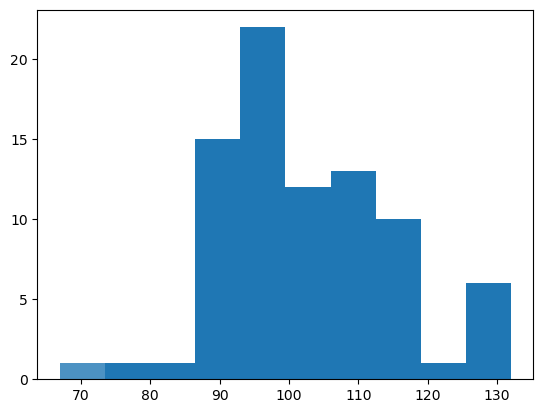

In [118]:
plt.hist(knicks_pts_10, alpha=0.8, normed = True, label='knicks')
plt.hist(nets_pts_10, alpha=0.8, normed = True, label='nets')
plt.legend()
plt.title("2010 Season")
plt.show()
plt.close()

7. Compare the 2010 NBA games to 2014. Replicate the steps from the previous three exercises using the **nba_2014**. Create the two data series named knicks_pts14 and nets_pts_14 that represents the points of each team scored in their games.

AttributeError: Rectangle.set() got an unexpected keyword argument 'normed'

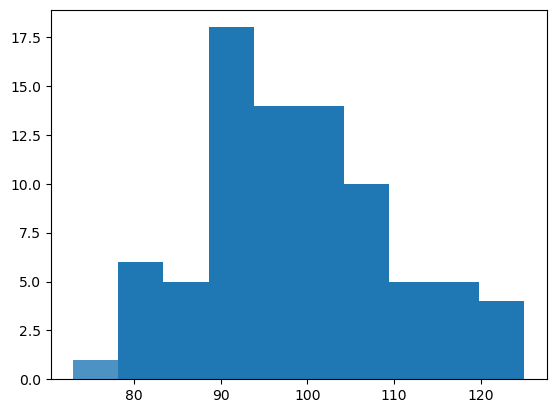

In [119]:
#Create the two series variable. 
knicks_pts_14 = nba_2014.pts[nba.fran_id=='Knicks']
nets_pts_14 = nba_2014.pts[nba.fran_id=='Knicks']

#Perform means against the knicks_pts_14 and nets_pts_14. 
knicks_mean_score_14 = np.mean(knicks_pts_14)
nets_mean_score_14 = np.mean(nets_pts_14)

#Find the differences between the above variables. 
diff_means_14 = knicks_mean_score_14 - nets_mean_score_14

#Create the overlapping histograms. 
plt.hist(knicks_pts_14, alpha=0.8, normed = True, label='knicks')
plt.hist(nets_pts_14, alpha=0.8, normed = True, label='nets')
plt.legend()
plt.title("2014 Season")
plt.show()

8. Use the **nba_2010**, generate side-by-side boxplots with points (**pts**) on the y-axis and team (**fran_id**) on the x-axis.

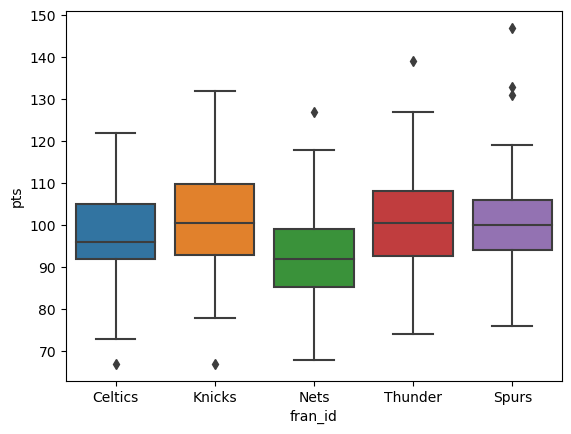

In [120]:
plt.clf() #to clear the previous plot
sns.boxplot(data = nba_2010, x = 'fran_id', y = 'pts')
plt.show()
plt.close()

9. Analyze the relationships between categorical variables to see if teams tend to win more games at home compared to away. 

In [121]:
location_results_freq = pd.crosstab(nba_2010.game_result, nba_2010.game_location)
print(location_results_freq)

game_location    A    H
game_result            
L              133  105
W               92  120


Based on the above contingency table, there were more wins at **home** than **away** games. 

10. Convert the table **location_results_freq** to a table of proportion by dividing the values in **location_results_freq** by the total observations. 

In [122]:
location_result_proportions = location_results_freq/len(nba_2010)
print(location_result_proportions)

game_location         A         H
game_result                      
L              0.295556  0.233333
W              0.204444  0.266667


In [123]:
chi2, pval, dof, expected = chi2_contingency(location_result_proportions)
print(expected)
print(chi2)

[[0.26 0.26]
 [0.24 0.24]]
0.0


11. Using the **nba_2010** variable, calculate the covariance between the **forecase** and **point_diff** in the dataset. 

In [124]:
point_diff_forecast_cov = np.cov(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_cov)

[[  0.05   1.37]
 [  1.37 186.56]]


12. Because 538's **forecast** variable is reported as a probability, let's calculate the strength of the correlation using the **pearsonr()** method. Use the **nba_2010**, calculate the correlation between **forecast** and **point_diff**. Call this **point_diff_forecast_corr**. Save and print the result. 

In [125]:
point_diff_forecast_corr = pearsonr(nba_2010.forecast, nba_2010.point_diff)
print(point_diff_forecast_corr)

PearsonRResult(statistic=0.4402088708468081, pvalue=9.41039157313972e-23)


13. Generate a scatter plot of **forecast** on the **x-axis** and the **point_diff** on the **y-axis**.

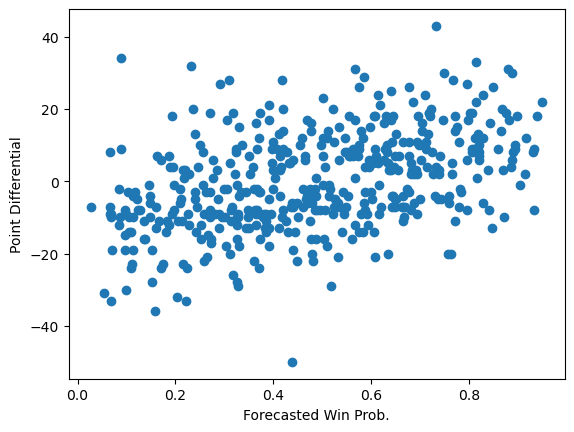

In [126]:
plt.clf() #to clear the previous plot
plt.scatter('forecast', 'point_diff', data=nba_2010)
plt.xlabel('Forecasted Win Prob.')
plt.ylabel('Point Differential')
plt.show()

As shown above, the correlation does make sense becase uf how the scatter plot shows medium correlation as linear. 

## Summary ##

In this notebook, it went through the process of importing the nba_games.csv file and analyzed the file for various trends of the NBA games. 